## California_house_price_dataset

I have fetched this dataset fro sklearn datasets.This data looks like a regression problems where the target variable is house price.So lets solve this problem.

I have imported numpy and pandas for data operations.Pyplot from the matplotlib and seaborn are imported for data visualizations.Sklearn library for data modelling and metric evaluation.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV

#importing warnings to suppress while raise of the error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#fetching the datset out from sklearn
from sklearn import datasets
calihouses = datasets.fetch_california_housing()
cal=calihouses.data
cal

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [3]:
#checking for the features names in the dataset
calihouses.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
#putting the data to the dataframe
cal=pd.DataFrame(cal,columns=calihouses.feature_names)
cal

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
#adding the target variable alongwith the dataset
cal['price']=calihouses.target

In [6]:
#structure of the data
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#getting the info of the diffrent features present
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
price         20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


Verifying for any null values

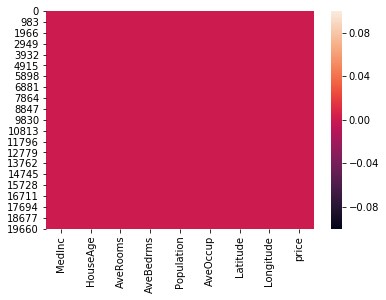

In [8]:
#checking for any null values in the dataset
sns.heatmap(cal.isnull())

#Graph shows there is no null values in the dataset

Correlation

In [9]:
#checking for the correlation among the features
calcor=cal.corr()
calcor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


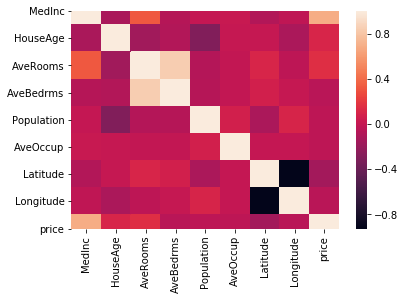

In [10]:
#plotting the correlation using heatmap
sns.heatmap(cal.corr())

From the correlation map,we see there is good correlation of data among each other

Data Visualization

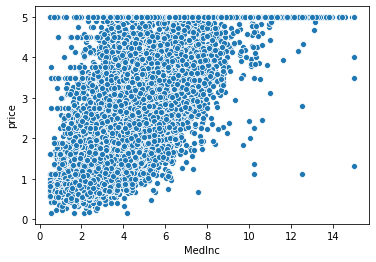

In [11]:
sns.scatterplot(x='MedInc',y='price',data=cal)

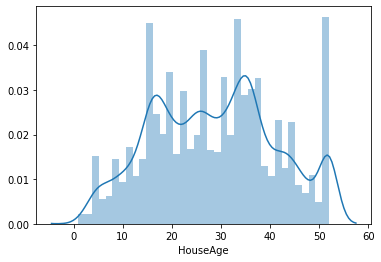

In [12]:
sns.distplot(cal['HouseAge'])

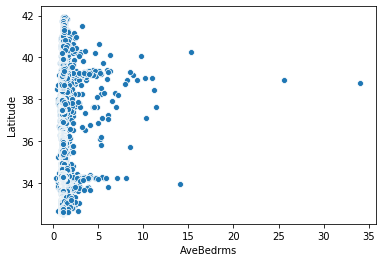

In [13]:
#plotting scatterplot on avebedrms vs latitude
sns.scatterplot(x='AveBedrms',y='Latitude',data=cal)

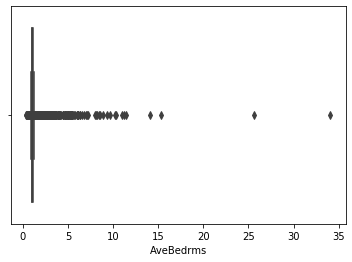

In [14]:
#as the data seems to be out of range,so plotting boxplot for avebedrms
sns.boxplot(cal['AveBedrms'])

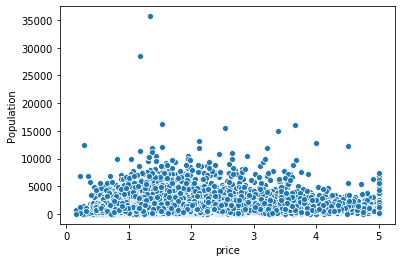

In [15]:
#Plotting scatterplot for target wrt to population
sns.scatterplot(y='Population',x='price',data=cal)

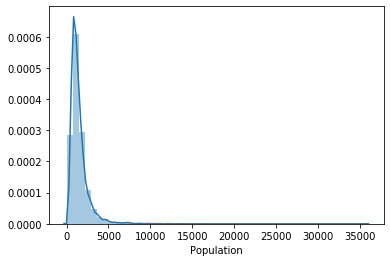

In [16]:
sns.distplot(cal['Population'])

In [17]:
#Lets describe the dataset for some statistical summary
cal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Describe shows that there is some outliers present in the dataset which affects the mean as well as standard deviation,So lets reduce the outliers

In [18]:
#importing boxcox to balanced highly skewd data
value=['AveRooms','AveBedrms','Population','AveOccup']
from scipy.stats import boxcox
for i in value:
    cal[i]=boxcox(cal[i],0)

In [19]:
#getting the shape of the dataset
cal.shape

(20640, 9)

Importing zscore to handle outliers

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(cal))
cal_new=cal[(z<3).all(axis=1)]
cal_new.shape

(19603, 9)

We see there is difference of around 900 rows after applying zscore

In [21]:
#taking modified zscore dataset as final dataset
cal=cal_new

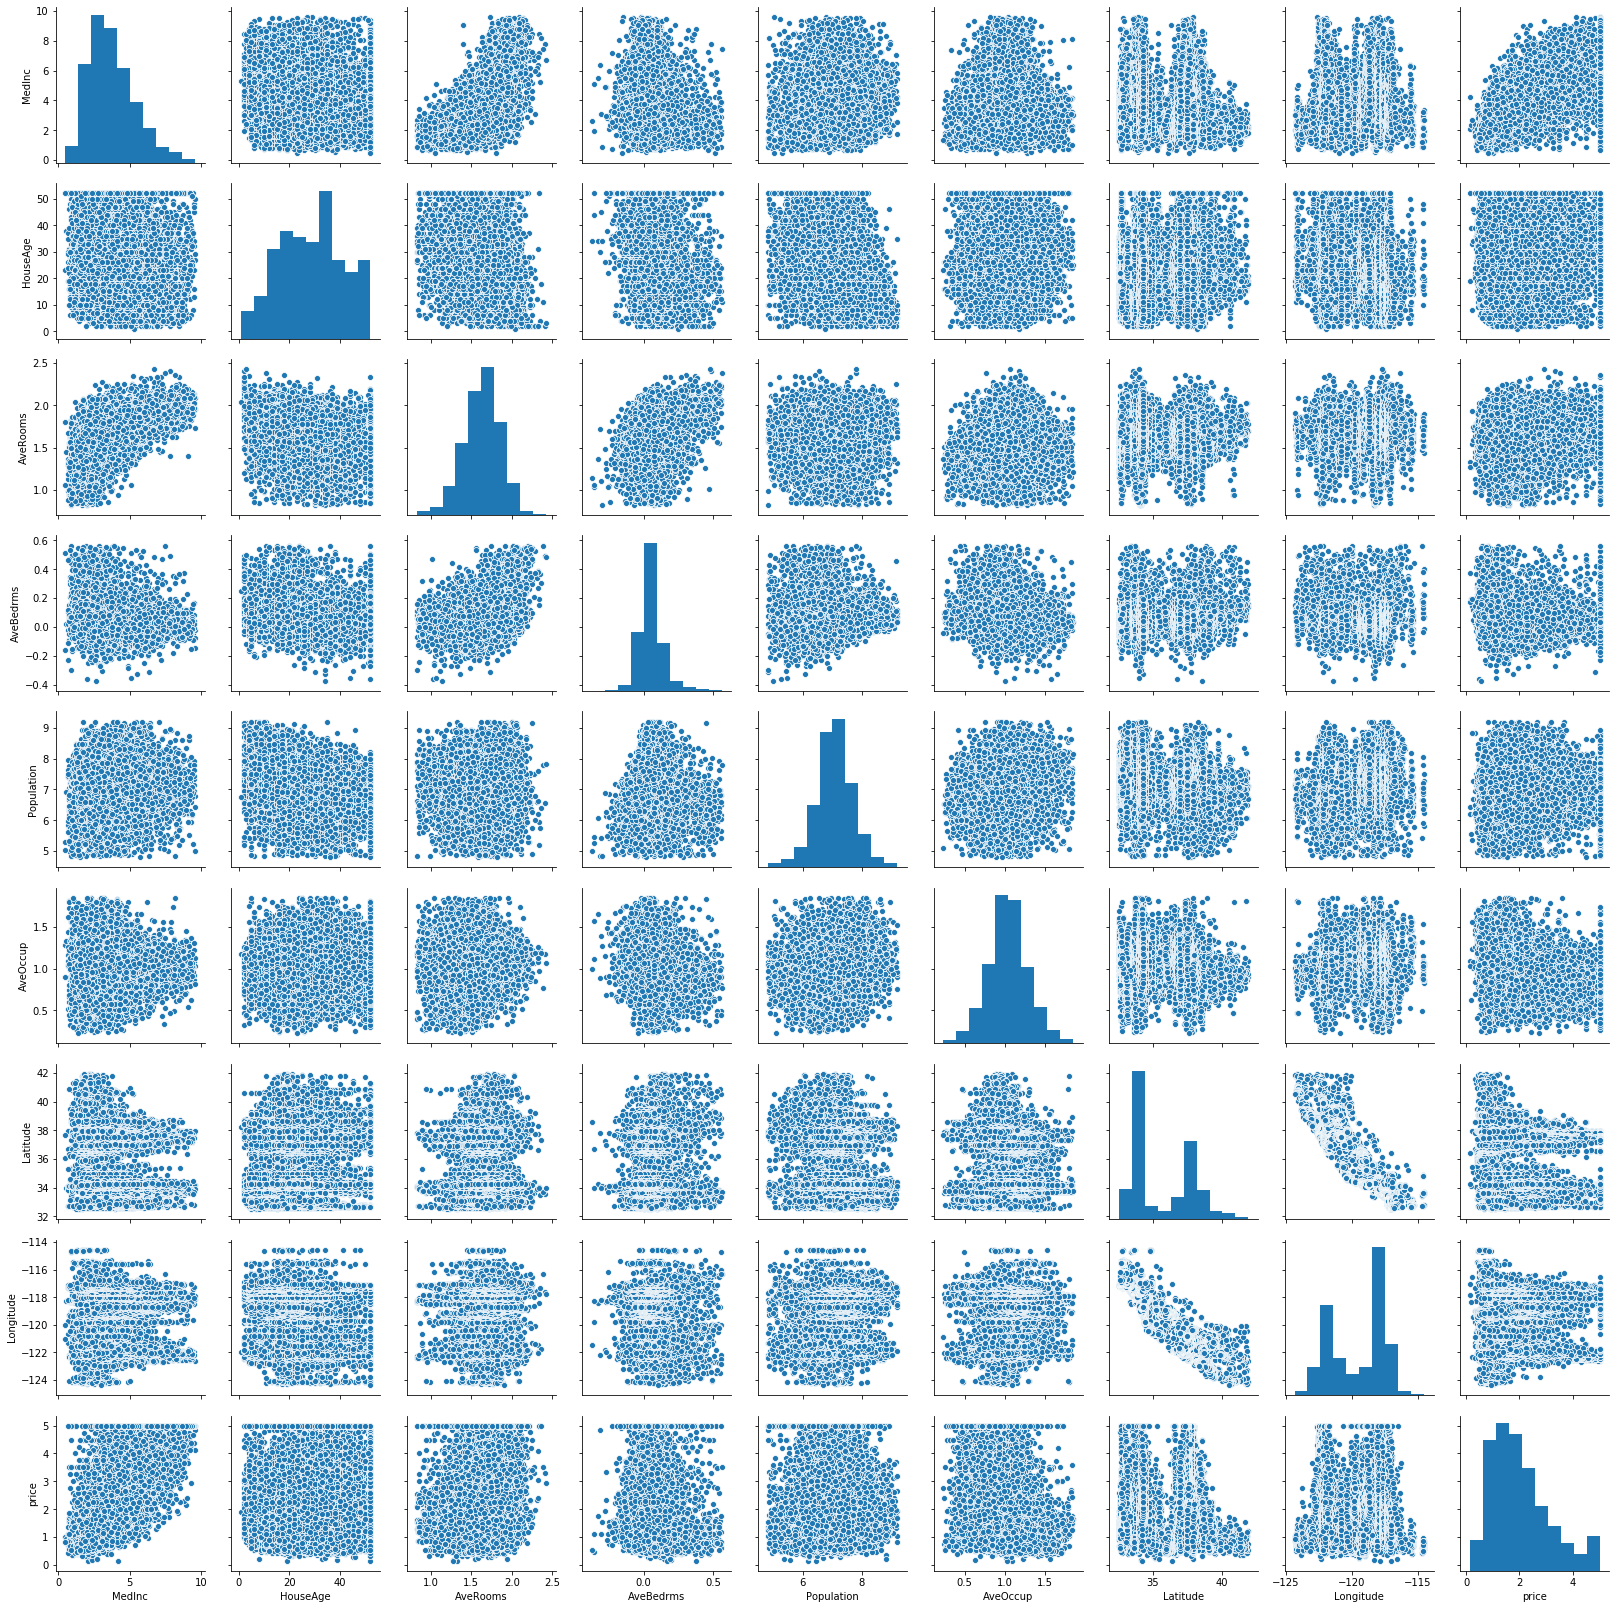

In [22]:
#plotting the pairplot for whole dataset
sns.pairplot(cal)

Shaping the data for machine learning operations

In [23]:
#Lets seprate the dataset obtained after removing the outliers into input and output
df_x=cal.drop('price',axis=1)
y=cal['price']

Lets check for the skewed values

In [24]:
df_x.skew()

MedInc        0.788060
HouseAge      0.045267
AveRooms     -0.362918
AveBedrms     1.389230
Population   -0.134573
AveOccup      0.026762
Latitude      0.467792
Longitude    -0.305840
dtype: float64

In [25]:
#we have some skewed data above 0.55,so lets manage it
for col in df_x.columns:
    if df_x[col].skew()>0.55:
        df_x[col]=np.log1p(df_x[col])

In [26]:
#Lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)

#putting the scaled value back to the dataframe
x=pd.DataFrame(x,columns=df_x.columns)

In [27]:
#creating function for determining random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [28]:
#creating the function for algorithm operations
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))
    print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

In [29]:
#importing timer for getting the time interval of process
from timeit import default_timer as timer

In [30]:
#creating function to evaluate cross_val_score
def cross_val(alg):
    
    start_cv=timer()
    score=cross_val_score(alg,x,y,cv=5,scoring='r2')
    print(score)
    print('mean_cross_val_score=',score.mean())
    print('standard_deviation cross_val_score=',score.std())
    end_cv=timer()
    interval=float(end_cv - start_cv)
    print('time taken=',interval)

Lets start to apply algorithms one by one to the input to get output prediction

Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.638660334516337 at 74


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=74)
model(lm)

mean_squared_error= 0.44044140152271527
mean_absolute_error= 0.49992329057225227
r2_score= 0.6480126996502026
root_mean_squared_error= 0.6636575935847606


In [33]:
cross_val(lm)

[0.5287518  0.52596703 0.60306942 0.58054799 0.66366685]
mean_cross_val_score= 0.580400619653741
standard_deviation cross_val_score= 0.051142503747671195
time taken= 0.06156310000000076


Decision tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.6226931057465486 at 100


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)
model(dtr)

mean_squared_error= 0.4653204210787468
mean_absolute_error= 0.44003533141576306
r2_score= 0.6223746404380834
root_mean_squared_error= 0.6821439885234984


K-neighbors

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 20}

In [37]:
knr=KNeighborsRegressor(n_neighbors=20)
random(knr)

0.7180750112197081 at 74


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=74)
model(knr)

mean_squared_error= 0.34142551706270347
mean_absolute_error= 0.4175028315813881
r2_score= 0.7271431668186701
root_mean_squared_error= 0.5843162817025583


In [39]:
cross_val(knr)

[0.59418831 0.65625075 0.64652905 0.46329676 0.57448067]
mean_cross_val_score= 0.586949106901015
standard_deviation cross_val_score= 0.06906556205273158
time taken= 3.651264700000013


From the above algorithms,I get the best score from K-neighbors.So,considering as a final algorithm.

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=55)
model(knr)

mean_squared_error= 0.34976021580244365
mean_absolute_error= 0.42057044009893335
r2_score= 0.7136085055905456
root_mean_squared_error= 0.591405288953729


In [41]:
cross_val(knr)

[0.59418831 0.65625075 0.64652905 0.46329676 0.57448067]
mean_cross_val_score= 0.586949106901015
standard_deviation cross_val_score= 0.06906556205273158
time taken= 3.425372999999979


In [42]:
#saving the model
from sklearn.externals import joblib
joblib.dump(knr,'knr_houseprice.pkl')

['knr_houseprice.pkl']

## Conclusion

In this project,I checked for null values first and correlataion among the various columns of the dataset.I analysed the behaviour of data by plotting graphs from various perception sto get the data insights.On the statistical summary,it shows some presence of outliers int it.So zscore is used to manage them and skewed values also checked.After that,data is scaled using standard scaler to be in the same unit.
On applying various machine learning models,I get the best fit from the K-Neighbors Regressor